In [15]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as shibal
import mplfinance as mplf
import zipfile

In [4]:
def prep_df(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
    return df.sort_values("Date")

In [5]:
cols = ["Date", "Close", "High", "Low", "Open", "Volume"]

AIG_df = prep_df(pd.read_csv("../data/gfc/AIG.csv", skiprows = 3, names = cols))
C_df = prep_df(pd.read_csv("../data/gfc/C.csv", skiprows = 3, names = cols))
JPM_df = prep_df(pd.read_csv("../data/gfc/JPM.csv", skiprows = 3, names = cols))
DJI_df = prep_df(pd.read_csv("../data/gfc/^DJI.csv", skiprows = 3, names = cols))
GSPC_df = prep_df(pd.read_csv("../data/gfc/^GSPC.csv", skiprows = 3, names = cols))
VIX_df = prep_df(pd.read_csv("../data/gfc/^VIX.csv", skiprows = 3, names = cols))

TEDRATE_df = prep_df(pd.read_csv("../data/gfc/TEDRATE.csv", skiprows = 3, names = cols))
WGS3MO_df = prep_df(pd.read_csv("../data/gfc/WGS3MO.csv", skiprows = 3, names = cols))

allStocks = {
    "AIG": AIG_df,
    "C": C_df,
    "JPM": JPM_df,
    "DJI": DJI_df,
    "GSPC": GSPC_df,
    "VIX": VIX_df,
    "TEDRATE": TEDRATE_df,
    "WGS3MO": WGS3MO_df
}

## Generate trend graphs

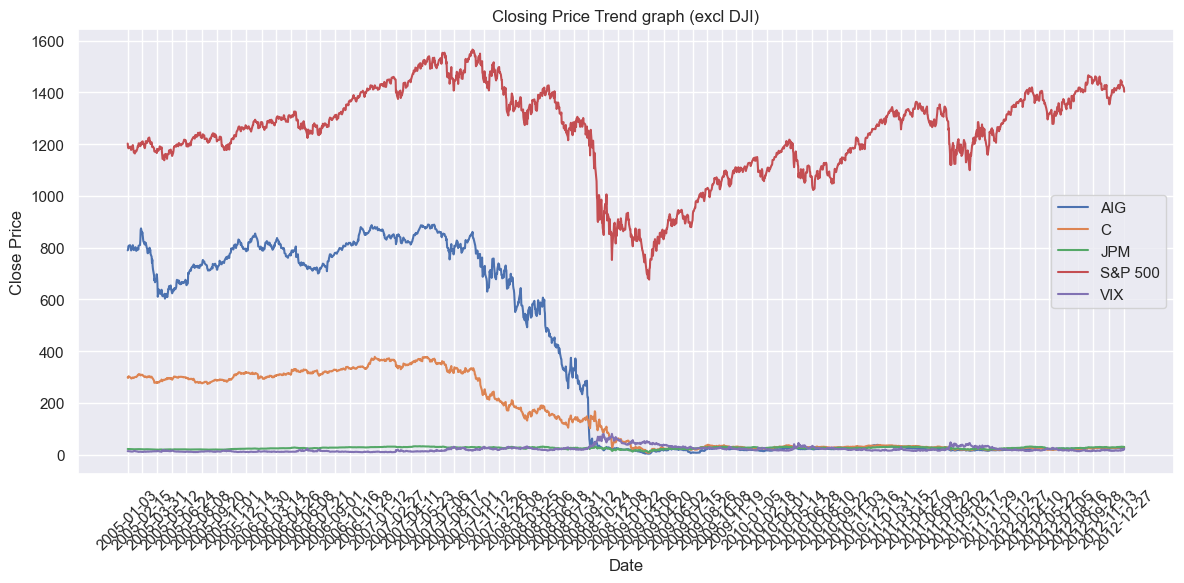

In [6]:
shibal.set_theme(style="darkgrid")

mlp.figure(figsize=(12, 6))
shibal.lineplot(data=AIG_df,  x = "Date", y = "Close", label = "AIG")
shibal.lineplot(data=C_df,    x = "Date", y = "Close", label = "C")
shibal.lineplot(data=JPM_df,  x = "Date", y = "Close", label = "JPM")
# shibal.lineplot(data=DJI_df,  x = "Date", y = "Close", label = "DJI")
shibal.lineplot(data=GSPC_df, x = "Date", y = "Close", label = "S&P 500")
shibal.lineplot(data=VIX_df,  x = "Date", y = "Close", label = "VIX")

dates = AIG_df["Date"]
mlp.xticks(dates[::30], rotation=45)

mlp.title("Closing Price Trend graph (excl DJI)")
mlp.xlabel("Date")
mlp.ylabel("Close Price")
mlp.tight_layout()
mlp.show()

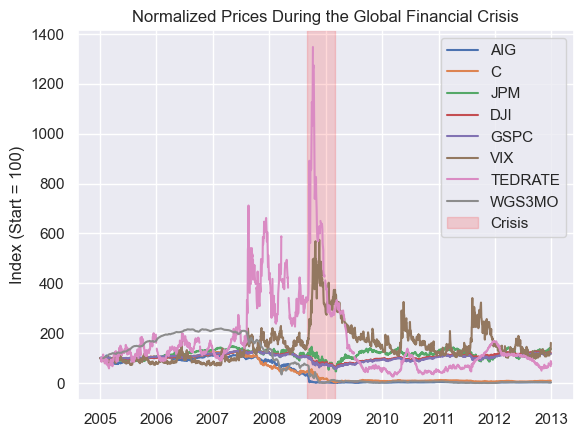

In [7]:
# time series
mlp.figure()

for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Normalized"] = df["Close"] / df["Close"].iloc[0] * 100
    mlp.plot(df["Date"], df["Normalized"], label=name)

mlp.axvspan(
    pd.Timestamp("2008-09-01"),
    pd.Timestamp("2009-03-01"),
    color="red",
    alpha=0.15,
    label="Crisis"
)

mlp.title("Normalized Prices During the Global Financial Crisis")
mlp.ylabel("Index (Start = 100)")
mlp.legend()
mlp.show()

c:\Users\josqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


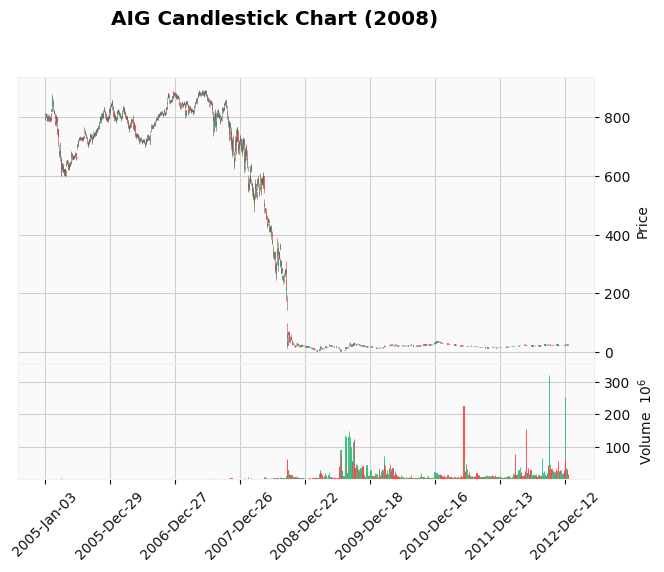

In [10]:
mplf.plot(
    AIG_df.set_index("Date"),
    type="candle",
    volume=True,
    style="yahoo",
    title="AIG Candlestick Chart (2008)"
)

C:\Users\josqu\AppData\Local\Temp\ipykernel_21456\1074279719.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Return"] = df["Close"].pct_change()


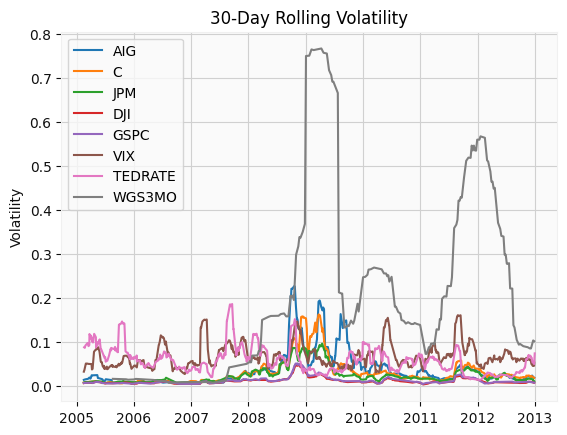

In [11]:
for name, df in allStocks.items():
    df = df.sort_values("Date").copy()
    df["Return"] = df["Close"].pct_change()
    df["RollingVol"] = df["Return"].rolling(30).std()

    mlp.plot(df["Date"], df["RollingVol"], label=name)

mlp.title("30-Day Rolling Volatility")
mlp.ylabel("Volatility")
mlp.legend()
mlp.show()  

## panic selling
compare price and volume of sales

when the stock tanked people panic sell

the y axis not the same but the trend of panic selling is clearly there

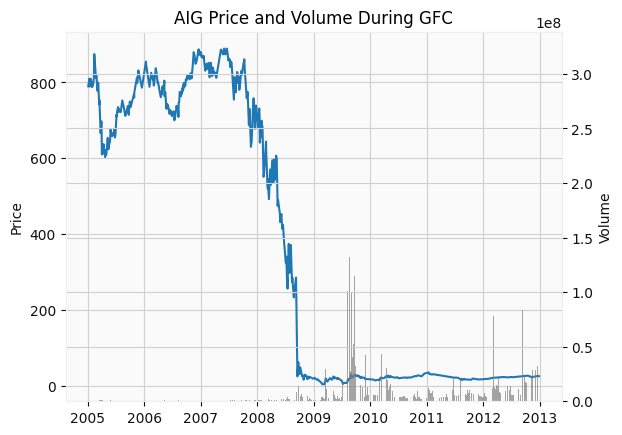

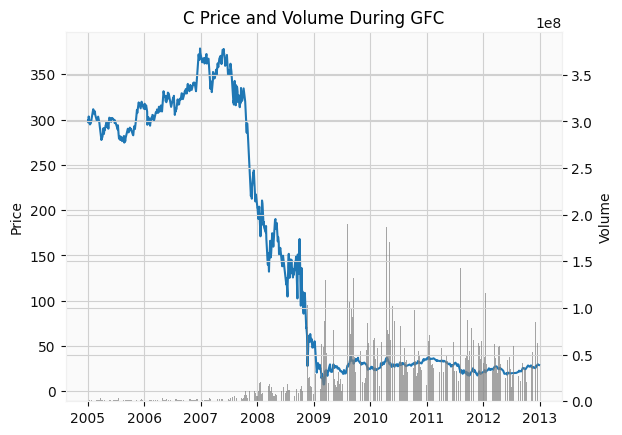

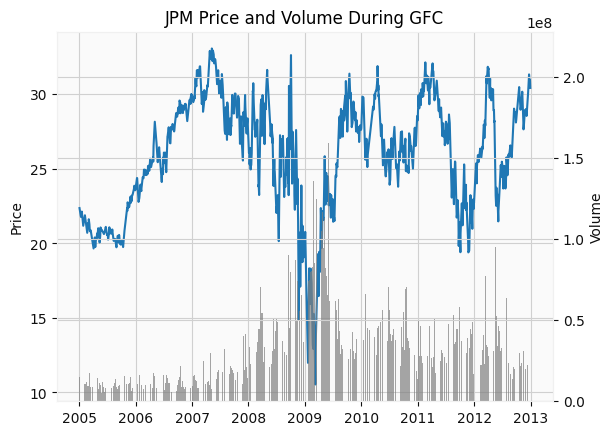

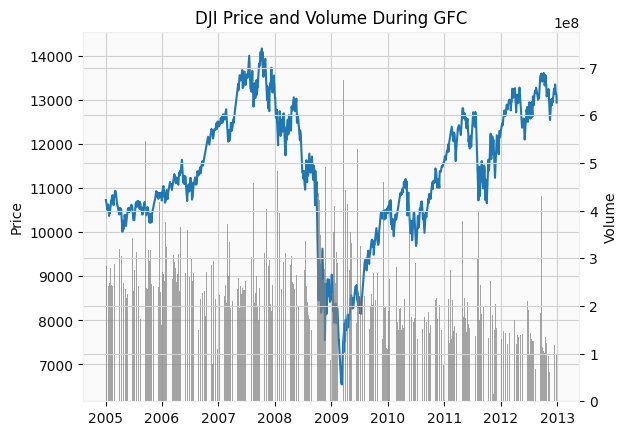

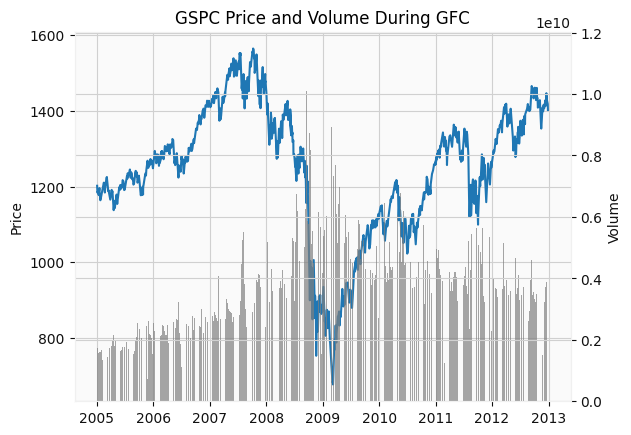

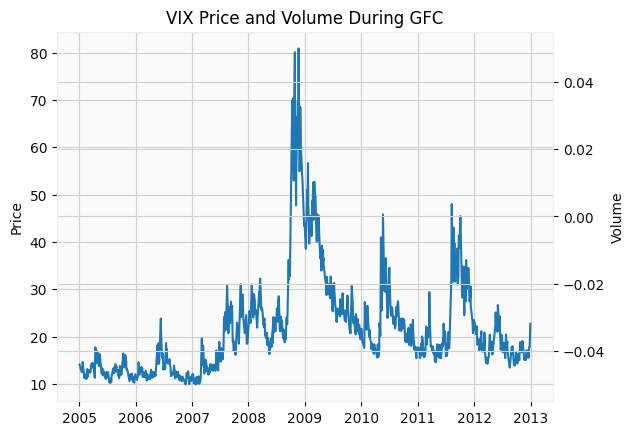

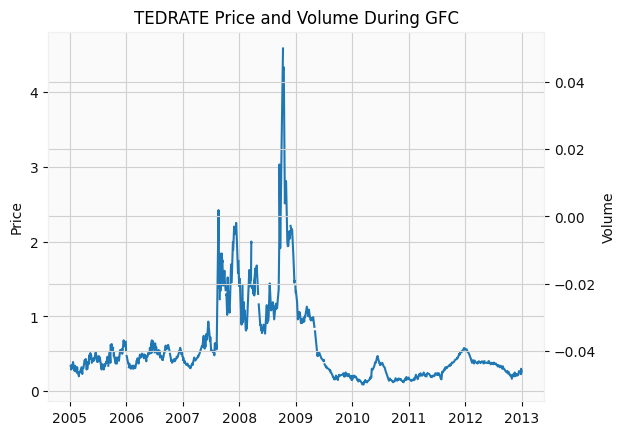

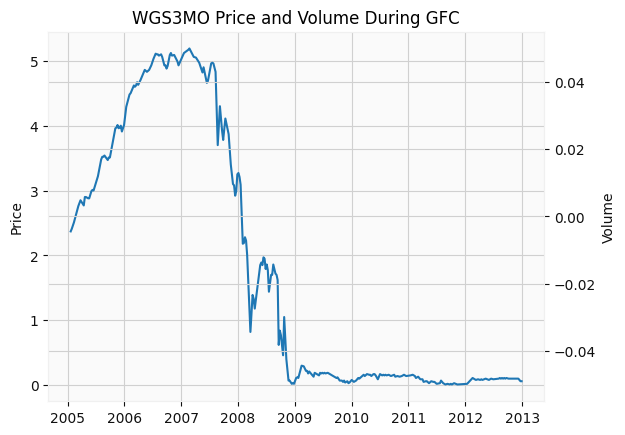

In [12]:
for name, df in allStocks.items():

    fig, ax1 = mlp.subplots()

    ax1.plot(df["Date"], df["Close"], color="tab:blue")
    ax1.set_ylabel("Price")

    ax2 = ax1.twinx()
    ax2.bar(df["Date"], df["Volume"], alpha=0.7, color="gray")
    ax2.set_ylabel("Volume")

    mlp.title(name + " Price and Volume During GFC")
    mlp.show()

# Token Data Analysis
taken from event_data.csv and token_transfers_V3

In [16]:
with open("../data/ERC20-stablecoins/token_transfers.csv") as f:
    # Read the first few rows
    sample = pd.read_csv(f, nrows=5)
    print(f"\n📋 All columns in token_transfers.csv:")
    print(sample.columns.tolist())
    print(f"\n📊 First 5 rows:")
    print(sample)


📋 All columns in token_transfers.csv:
['block_number', 'transaction_index', 'from_address', 'to_address', 'time_stamp', 'contract_address', 'value']

📊 First 5 rows:
   block_number  transaction_index  \
0      14669683                  7   
1      14669683                 45   
2      14669683                 46   
3      14669683                 47   
4      14669683                 48   

                                 from_address  \
0  0xd30b438df65f4f788563b2b3611bd6059bff4ad9   
1  0x4941834ed1428089ee76252f6f9d767e800499b0   
2  0x2c1f9a20711e14f8484a41123e20d1b06858ebea   
3  0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0   
4  0x66589b8278470d58d4112f3d065de0f75734312e   

                                   to_address  time_stamp  \
0  0xda816e2122a8a39b0926bfa84edd3d42477e9efd  1651105815   
1  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
2  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
3  0x3cd751e6b0078be393132286c442345e5dc49699  1651105815   
4  0

In [18]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    sep="\t",
    header=None,
    names=cols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)

# Ensure amount is numeric
token_df["amount"] = pd.to_numeric(df["amount"])

token_df.info()
token_df.head()

KeyboardInterrupt: 